# Predicting Numeric Outcomes with Linear Regression

**Aim**: The aim of this notebook is to predict the amount of a mobile transaction (numeric outcome) given all the other features in the dataset.

## Table of contents

1. Linear Regression in 2-Dimensions
2. Linear Regression to predict transaction amount
3. Model Optimization

In [120]:
import numpy as np
import pandas as pd

#Reading in the dataset
path = "datasets/"
df = pd.read_csv(path + 'fraud_prediction.csv')

df.head(10)
#df.describe()  # descriptive statistics

,Unnamed: 0,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_0,type_1,type_2,type_3,type_4
0,0,1.0,9839.64,170136.00,160296.36,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0
1,1,1.0,1864.28,21249.00,19384.72,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0
2,2,1.0,181.00,181.00,0.00,0.0,0.00,1.0,0.0,0.0,0.0,0.0,1.0
3,3,1.0,181.00,181.00,0.00,21182.0,0.00,1.0,0.0,1.0,0.0,0.0,0.0
4,4,1.0,11668.14,41554.00,29885.86,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0
5,5,1.0,7817.71,53860.00,46042.29,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0
6,6,1.0,7107.77,183195.00,176087.23,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0
7,7,1.0,7861.64,176087.23,168225.59,0.0,0.00,0.0,0.0,0.0,0.0,0.0,1.0
8,8,1.0,4024.36,2671.00,0.00,0.0,0.00,0.0,0.0,1.0,0.0,0.0,0.0
9,9,1.0,5337.77,41720.00,36382.23,41898.0,40348.79,0.0,0.0,0.0,0.0,0.0,1.0


In [89]:
#Define the feature 'oldbalanceOrg' and target 'amount' arrays

feature = df['oldbalanceOrg'].values
target = df['amount'].values

feature.shape  # dimensies

(28345,)

## Linear Regression in 2-Dimensions

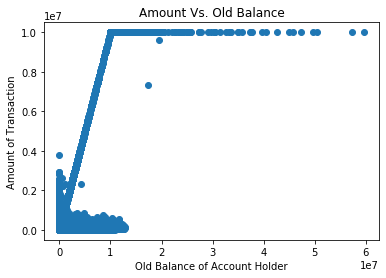

In [90]:
# display plots in Notebook cell
%matplotlib inline

import matplotlib.pyplot as plt

#Creating a scatter plot
plt.scatter(feature, target)
plt.xlabel('Old Balance of Account Holder')   
plt.ylabel('Amount of Transaction')           
plt.title('Amount Vs. Old Balance')
plt.show()

**Building the linear regression model**

Note: from the diagram, the data is not entirely linear.

In [91]:
from sklearn import linear_model

#Initializing a linear regression model 
linear_reg = linear_model.LinearRegression()

#Reshaping the array since we only have a single feature
#this is preparation for using scikit_learn
feature = feature.reshape(-1, 1)
target = target.reshape(-1, 1)

#Fitting the model on the data
linear_reg.fit(feature, target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

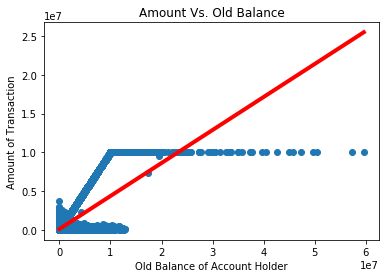

In [92]:
#Define the limits of the x-axis 
x_lim = np.linspace(min(feature), max(feature)).reshape(-1, 1)

#Creating the scatter plot
plt.scatter(feature, target)
plt.xlabel('Old Balance of Account Holder')
plt.ylabel('Amount of Transaction')
plt.title('Amount Vs. Old Balance')

#Creating the prediction line 
plt.plot(x_lim, linear_reg.predict(x_lim), color = 'red', lineWidth=4)

#Show the plot
plt.show()

## Discussions

This results in a line of best fit, as illustrated in the diagram.

In the preceding code, first, we initialize a linear regression model and fit the training data into that model. Since we only have a single feature, we need to reshape the feature and target for scikit-learn. Next, we define the upper and lower limits of the x axis, which contains our feature variable. 


## Linear Regression to predict transaction amount

Now that we have visualized how a simple linear regression model works in two dimensions, we can use the linear regression algorithm to predict the total amount of a mobile transaction, **using all of the other features** in our mobile transaction dataset.

The first step is to import our fraud prediction dataset into our workspace, split into features and target, and divide it into training and test sets. 

In [93]:
# Reading in the dataset 
path = './datasets/'
df = pd.read_csv(path + 'fraud_prediction.csv')

In [94]:
#Creating the features and target arrays
# i.e. drop column 'isFraud' from the features (=columns)
# and make a target array of 'isFraud'

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [95]:
# split features and target in training and test sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, 
                                                    random_state = 42, stratify = target)

**Fitting and evaluating the accuracy of the linear regression model**

We can now fit the linear regression model and evaluate the initial accuracy score of the model.

In [96]:
from sklearn import linear_model

#Initializing a linear regression model 
linear_reg = linear_model.LinearRegression()

In [97]:
#Fitting the model on the data
linear_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [98]:
#Accuracy of the model
linear_reg.score(X_test, y_test)

0.9857972380288648

This results in an accuracy score of 98%, which is fantastic!

----

# Optional enhancements of linear regression
**Scaling your data**

Scaling your data and providing a level of standardization is a vital step in any linear regression pipeline, as it could offer a way to enhance the performance of your model. 

In [99]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Setting up the scaling pipeline 
pipeline_order = [('scaler', StandardScaler()), ('linear_reg', linear_model.LinearRegression())]
pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 
linear_reg_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 
linear_reg_scaled.score(X_test, y_test)

0.9857972380288648

In this case, scaling the data did not lead to any improvements in the accuracy score, but it is vital to implement scaling into your linear regression pipeline, as it does lead to an improvement in the accuracy scores in most cases.

## Model Optimization

The fundamental objective of the linear regression algorithm is to minimize the loss/cost function. In order to do this, the algorithm tries to optimize the values of the coefficients of each feature (**Parameter1**), such that the loss function is minimized. 

Sometimes, this leads to **overfitting**, as the coefficients of each variable are optimized for the data that the variable is trained on. This means that your linear regression model will not generalize beyond your current training data very well.

The process by which we penalize hyper-optimized coefficients in order to prevent this type of overfitting is called **regularization**. 

There are two broad types of regularization methods, as follows:

- Ridge regression 
- Lasso regression


**Ridge Regression**

The equation for ridge regression is as follows:

![ridge_loss_function](images/ridgelossfunction.jpg)

In the preceding equation, the ridge loss function is equal to the ordinary least squares loss function, plus the product of the square of Parameter1 of each feature and alpha. 

alpha is a parameter that we can optimize in order to control the amount by which the ridge loss function penalizes the coefficients, in order to prevent overfitting. Obviously, if alpha is equal to 0, the ridge loss function is equal to the ordinary least squares loss function, thereby making no difference to the initial overfit model. 

Therefore, optimizing this value of alpha provides the optimal model that can generalize beyond the data that it has trained on. 
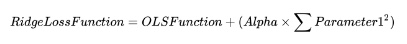

In [100]:
# Reading in the dataset 
path = './datasets/'
df = pd.read_csv(path + 'fraud_prediction.csv')

In [101]:
#Creating the features 
features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [102]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [103]:
from sklearn.linear_model import Ridge

#Initialize a ridge regression model
# standardize the data: alpha = 0 and normalize = True
ridge_reg = Ridge(alpha = 0, normalize = True)

In [104]:
#Fit the model to the training data 
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [105]:
#Extract the score from the test data
ridge_reg.score(X_test, y_test)

0.9857972380288648

Note: The accuracy of this model is exactly the same as the accuracy of the model that we built without the ridge regression, as the parameter that controls how the model is optimized: alpha is set to 0.

**Optimizing alpha using GridSearchCV**

Obtain the optimal value of alpha with the GridSearchCV algorithm

In [106]:
from sklearn.model_selection import GridSearchCV

#Building the model  
ridge_regression = Ridge()

#Using GridSearchCV to search for the best parameter from a range of values
grid = GridSearchCV(ridge_regression, {'alpha':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter
print("The most optimal value of alpha is:", grid.best_params_)


# Note about FutureWarnings:
# see article on https://machinelearningmastery.com/how-to-fix-futurewarning-messages-in-scikit-learn/

The most optimal value of alpha is: {'alpha': 0.01}


In [107]:
#Initializing an ridge regression object
ridge_regression = Ridge(alpha = 0.01)

#Fitting the model to the training and test sets
ridge_regression.fit(X_train, y_train)

Ridge(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [108]:
#Accuracy score of the ridge regression model
ridge_regression.score(X_test, y_test)

0.9857972164942482

Note: Since our initial model was already well optimized, the accuracy score did not increase by an observable amount. However, on datasets with larger dimensions/features, ridge regression holds immense value for providing you with a model that generalizes well, without overfitting.

In order to verify the results that the GridSearchCV algorithm has provided us with, we will construct a plot between the accuracy scores on the y axis and the different values of alpha along the x axis, for both the training and test data. 

We first initialize two empty lists, to store the accuracy scores for both the training and test data. We then evaluate the accuracy scores for both the training and test sets for different values of alpha, and we create a plot. 

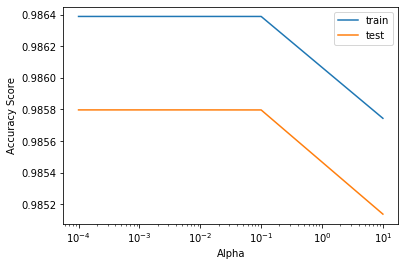

In [109]:
train_errors = []
test_errors = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 10]

# Evaluate the training and test classification errors for each value of alpha

for value in alpha_list:
    
    # Create Ridge object and fit
    ridge_regression = Ridge(alpha= value)
    ridge_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(ridge_regression.score(X_train, y_train) )
    test_errors.append(ridge_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(alpha_list, train_errors, alpha_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('Alpha')
plt.show()

In the preceding plot, it is clear that a value of 0.01 or lower provides the highest value of accuracy for both the training and test data, and therefore, the results from the GridSearchCV algorithm make logical sense.

**Lasso Regression**

The equation for lasso regression is as follows:

![lasso_loss_function](images/lassolossfunction.jpg)

In the preceding equation, the lasso loss function is equal to the ordinary least squares loss function plus the product of the absolute value of the coefficients of each feature and alpha. 

alpha is a parameter that we can optimize to control the amount by which the lasso loss function penalizes the coefficients, in order to prevent overfitting. Once again, if alpha is equal to 0, the lasso loss function is equal to the ordinary least squares loss function, thereby making no difference to the initial overfit model. 

Therefore, optimizing this value of alpha provides the optimal model that generalizes well beyond the data that it has trained on. 

The following steps are the same as for the Ridge regression model.

In [110]:
# Reading in the dataset 
path = './datasets/'
df = pd.read_csv(path + 'fraud_prediction.csv')

In [111]:
#Creating the features 
features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [112]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [113]:
from sklearn.linear_model import Lasso

#Initialize a lasso regression model
lasso_reg = Lasso(alpha = 0, normalize = True)

In [114]:
import warnings
warnings.filterwarnings('ignore')

#Fit the model to the training data 
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0, copy_X=True, fit_intercept=True, max_iter=1000, normalize=True,
      positive=False, precompute=False, random_state=None, selection='cyclic',
      tol=0.0001, warm_start=False)

In [115]:
#Extract the score from the test data
lasso_reg.score(X_test, y_test)

0.98579723802549

**Optimizing alpha using GridSearchCV**

In [116]:
#Building the model  
lasso_regression = Lasso()

#Using GridSearchCV to search for the best parameter
grid = GridSearchCV(lasso_regression, {'alpha':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter
print("The most optimal value of alpha is:", grid.best_params_)

The most optimal value of alpha is: {'alpha': 0.0001}


In [117]:
#Initializing an lasso regression object

lasso_regression = Lasso(alpha = 0.0001)

#Fitting the model to the training and test sets

lasso_regression.fit(X_train, y_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [118]:
#Accuracy score of the lasso regression model

lasso_regression.score(X_test, y_test)

0.9857644406406523

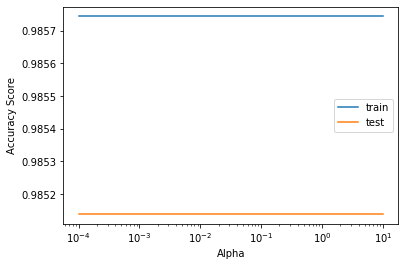

In [119]:
train_errors = []
test_errors = []

alpha_list = [0.0001, 0.001, 0.01, 0.1, 10]

# Evaluate the training and test classification errors for each value of alpha

for value in alpha_list:
    
    # Create Lasso object and fit
    lasso_regression = Lasso(alpha= value)
    lasso_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(ridge_regression.score(X_train, y_train) )
    test_errors.append(ridge_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(alpha_list, train_errors, alpha_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('Alpha')
plt.show()

All of the values of alpha provide the same values of accuracy scores, and we can thus pick the value given to us by the GridSearchCV algorithm.

# Summary

You've learned about how the linear regression algorithm works internally, through key concepts such as **residuals** and **ordinary least squares**. You also learned how to visualize a simple linear regression model in two dimensions.

We also covered implementing the linear regression model to predict the amount of a mobile transaction, along with scaling your data in an effective pipeline, to bring potential improvements to your performance. 

Finally, you learned how to optimize your model by using the concept of **regularization**, in the form of ridge and lasso regression.